In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

2023-07-12 08:48:26.802448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-12 08:48:26.998928: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-12 08:48:26.998988: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-12 08:48:28.816519: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# Load the binned data from the CSV file
data = pd.read_csv('binned_data.csv')

input_data = np.load("combined_data.npz")['data']

# Separate the features (input) and labels (output)
features = input_data[:, 2:] 

# Split the data into train and validation sets
X_train, X_test, labels_train, labels_test = train_test_split(features, data, test_size=0.2, random_state=42)
labels_train = [np.array(labels_train['HII_EFF_FACTOR_bin']-1), np.array(labels_train['ION_Tvir_MIN_bin']-1), np.array(labels_train['R_BUBBLE_MAX_bin']-1)]
labels_test = [np.array(labels_test['HII_EFF_FACTOR_bin']-1), np.array(labels_test['ION_Tvir_MIN_bin']-1), np.array(labels_test['R_BUBBLE_MAX_bin']-1)]

# # Reshape the input data for CNN (assuming 1D sequence data)
# X_train = np.expand_dims(X_train, axis=2)
# X_test = np.expand_dims(X_test, axis=2)

# Scale the input data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))



In [3]:
# Load the trained model
model = load_model('./class_models/Dense_4/classification_model.h5')

2023-07-12 08:48:33.569067: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-12 08:48:33.569178: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-12 08:48:33.569227: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (iam-ssh1): /proc/driver/nvidia/version does not exist
2023-07-12 08:48:33.569667: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Evaluate the model on test data
evaluation_results = model.evaluate(X_test_scaled, labels_test, verbose=0)
test_loss = evaluation_results[0]
test_accuracy = evaluation_results[1]
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 4.728989601135254
Test Accuracy: 1.9761615991592407


In [5]:
# Predict labels for the test set
predictions = model.predict(X_test_scaled)
labels_predicted = [np.argmax(pred, axis=1) for pred in predictions]

62/62 [==============================] - 0s 2ms/step


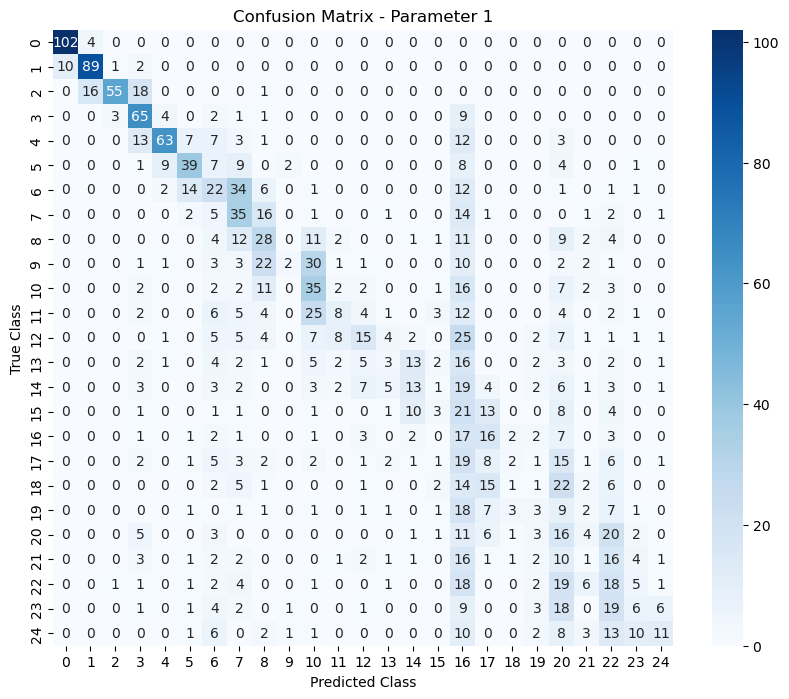

In [6]:
# Confusion Matrix - Parameter 1
confusion_mat = confusion_matrix(labels_test[0], labels_predicted[0])
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Parameter 1')
plt.show()


In [7]:
# Classification Report - Parameter 1
classification_rep = classification_report(labels_test[0], labels_predicted[0])
print("Classification Report - Parameter 1:\n", classification_rep)

Classification Report - Parameter 1:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       106
           1       0.82      0.87      0.84       102
           2       0.92      0.61      0.73        90
           3       0.53      0.76      0.62        85
           4       0.78      0.58      0.66       109
           5       0.57      0.49      0.52        80
           6       0.23      0.23      0.23        94
           7       0.27      0.44      0.33        79
           8       0.28      0.33      0.30        85
           9       0.33      0.03      0.05        79
          10       0.28      0.41      0.33        85
          11       0.31      0.10      0.16        77
          12       0.35      0.17      0.23        89
          13       0.15      0.05      0.07        64
          14       0.30      0.17      0.22        75
          15       0.19      0.05      0.07        64
          16       0.05      0.29      0.09

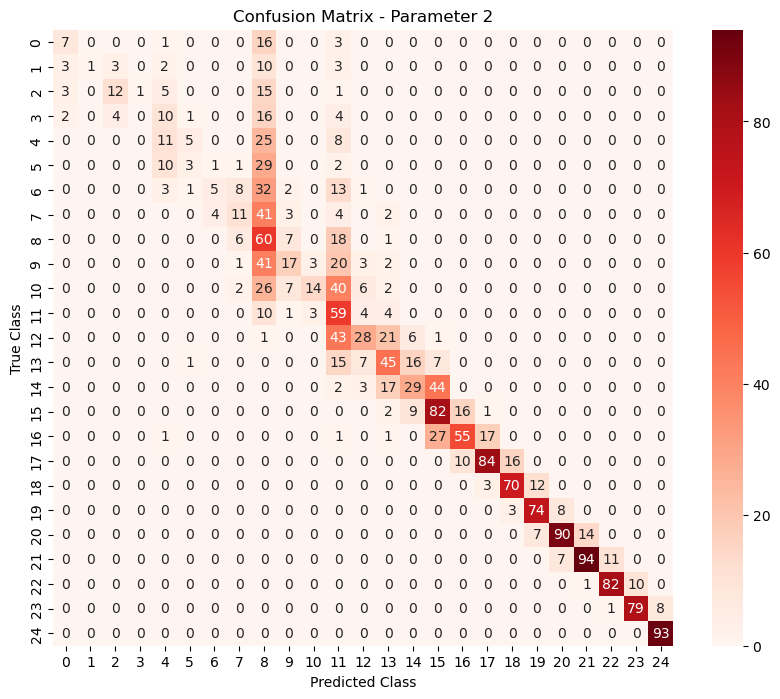

In [8]:
# Confusion Matrix - Parameter 2
confusion_mat = confusion_matrix(labels_test[1], labels_predicted[1])
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Parameter 2')
plt.show()

In [9]:
# Classification Report - Parameter 2
classification_rep = classification_report(labels_test[1], labels_predicted[1])
print("Classification Report - Parameter 1:\n", classification_rep)

Classification Report - Parameter 1:
               precision    recall  f1-score   support

           0       0.47      0.26      0.33        27
           1       1.00      0.05      0.09        22
           2       0.63      0.32      0.43        37
           3       0.00      0.00      0.00        37
           4       0.26      0.22      0.24        49
           5       0.27      0.07      0.11        46
           6       0.50      0.08      0.13        65
           7       0.38      0.17      0.23        65
           8       0.19      0.65      0.29        92
           9       0.46      0.20      0.27        87
          10       0.70      0.14      0.24        97
          11       0.25      0.73      0.37        81
          12       0.54      0.28      0.37       100
          13       0.46      0.49      0.48        91
          14       0.48      0.31      0.37        95
          15       0.51      0.75      0.61       110
          16       0.68      0.54      0.60

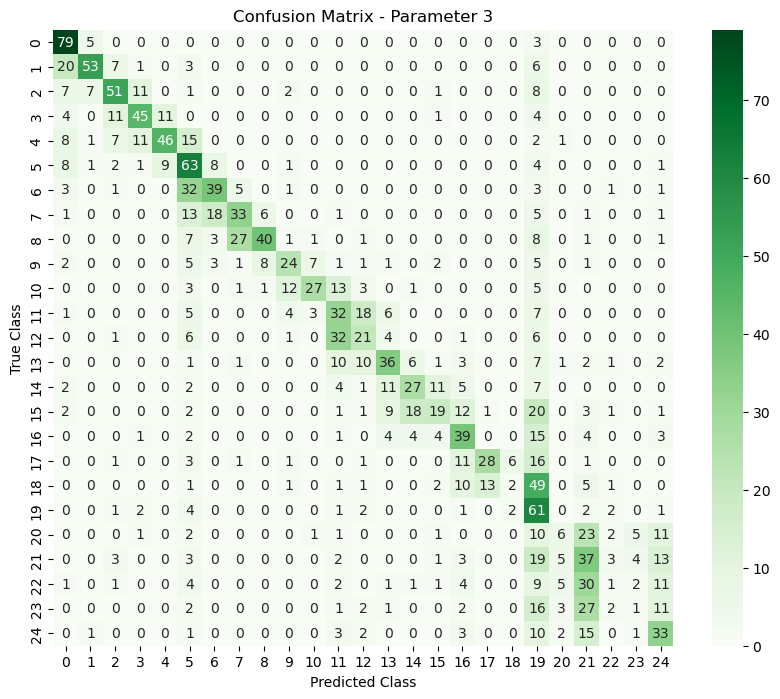

In [10]:
# Confusion Matrix - Parameter 3
confusion_mat = confusion_matrix(labels_test[2], labels_predicted[2])
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Parameter 3')
plt.show()